In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


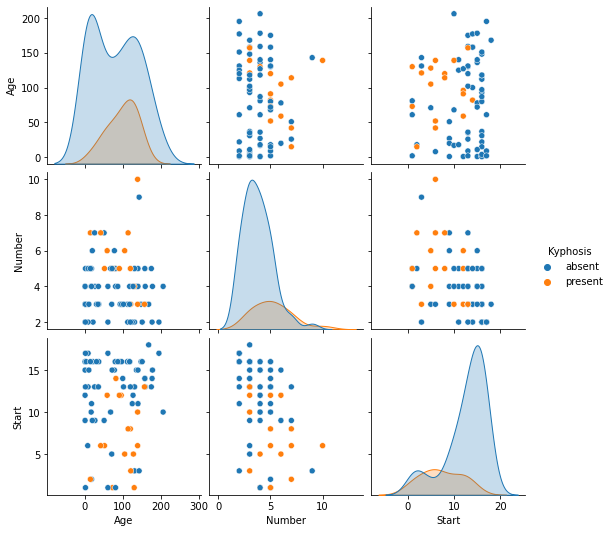

In [5]:
sns.pairplot(df, hue = 'Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['Kyphosis'], axis = 1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

DECISION TREES

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
y_pred = dtree.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[16,  3],
       [ 4,  2]])

Text(0.5, 15.0, 'Predict Label')

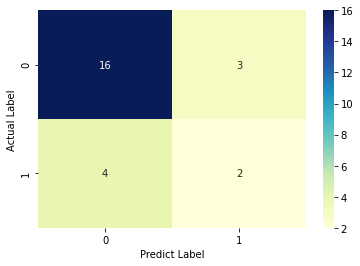

In [14]:
sns.heatmap(cnf_matrix, annot = True, cmap = 'YlGnBu', fmt  = 'd')
plt.ylabel('Actual Label')
plt.xlabel('Predict Label')

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [16]:
from sklearn import tree

In [17]:
feature = list(df.columns[1:])
targets = ['absent', 'present']

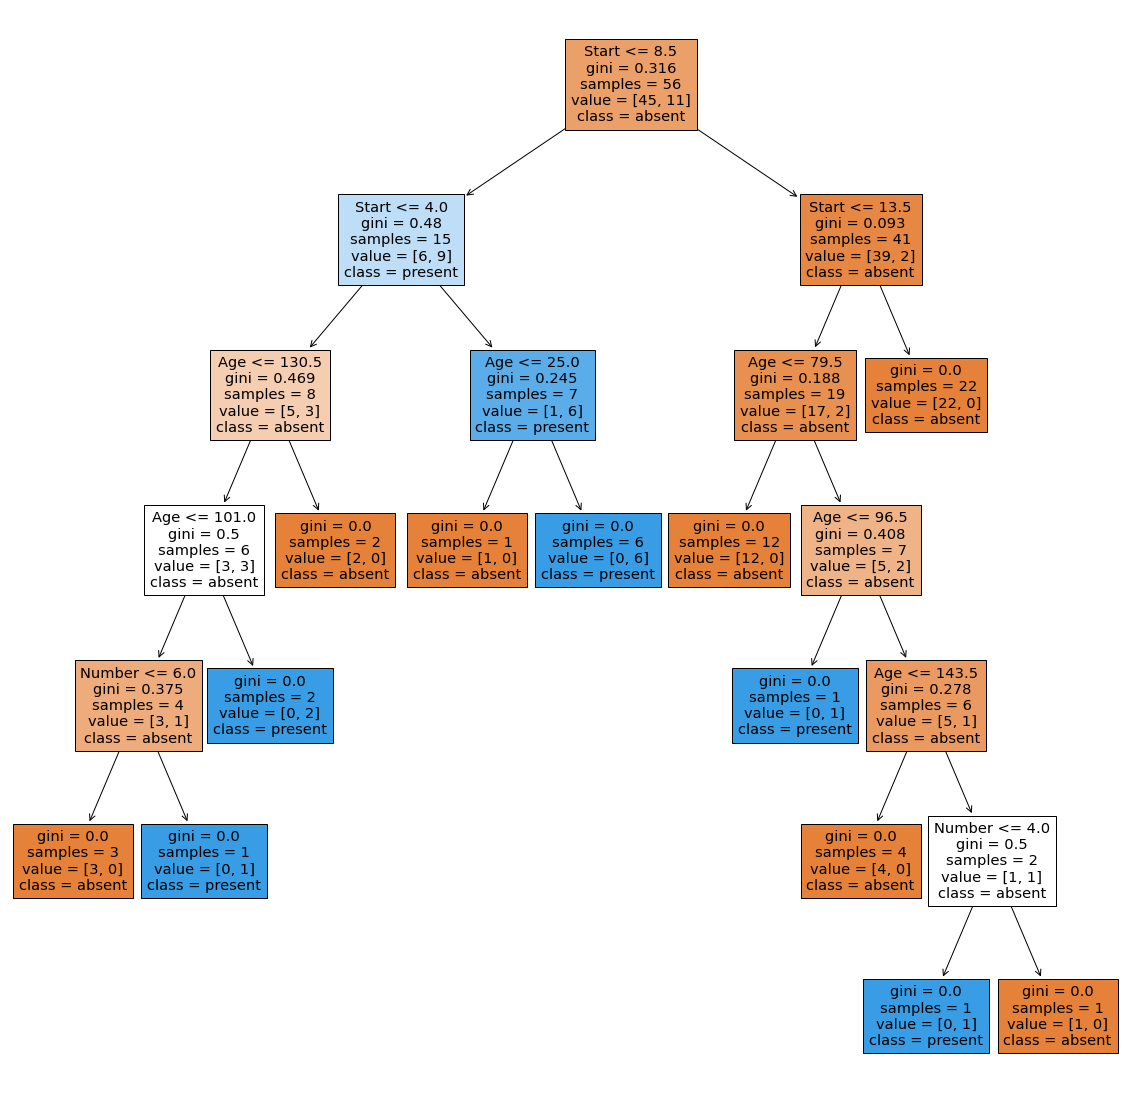

In [18]:
plt.figure(figsize=(20,20) )
tree2 = tree.plot_tree(dtree, filled = True, feature_names = feature, class_names = targets)

RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [22]:
y_pred = model.predict(X_test)

In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[19,  0],
       [ 5,  1]])

Text(0.5, 15.0, 'Predict Label')

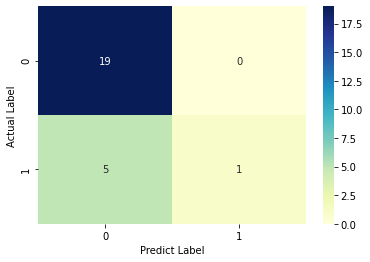

In [24]:
sns.heatmap(cnf_matrix, annot = True, cmap = 'YlGnBu', fmt  = 'd')
plt.ylabel('Actual Label')
plt.xlabel('Predict Label')

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



[Text(2755.5555555555557, 5436.0, 'Start <= 5.5\ngini = 0.245\nsamples = 34\nvalue = [48, 8]\nclass = absent'),
 Text(1377.7777777777778, 4228.0, 'Start <= 2.0\ngini = 0.5\nsamples = 7\nvalue = [6, 6]\nclass = absent'),
 Text(688.8888888888889, 3020.0, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = absent'),
 Text(2066.666666666667, 3020.0, 'Age <= 135.5\ngini = 0.245\nsamples = 4\nvalue = [1, 6]\nclass = present'),
 Text(1377.7777777777778, 1812.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 6]\nclass = present'),
 Text(2755.5555555555557, 1812.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = absent'),
 Text(4133.333333333334, 4228.0, 'Number <= 4.5\ngini = 0.087\nsamples = 27\nvalue = [42, 2]\nclass = absent'),
 Text(3444.4444444444443, 3020.0, 'gini = 0.0\nsamples = 21\nvalue = [35, 0]\nclass = absent'),
 Text(4822.222222222223, 3020.0, 'Start <= 12.5\ngini = 0.346\nsamples = 6\nvalue = [7, 2]\nclass = absent'),
 Text(4133.333333333334, 1812.0, 'Age <= 71.0\ngini = 0.5\nsamples = 3

<Figure size 1440x1440 with 0 Axes>

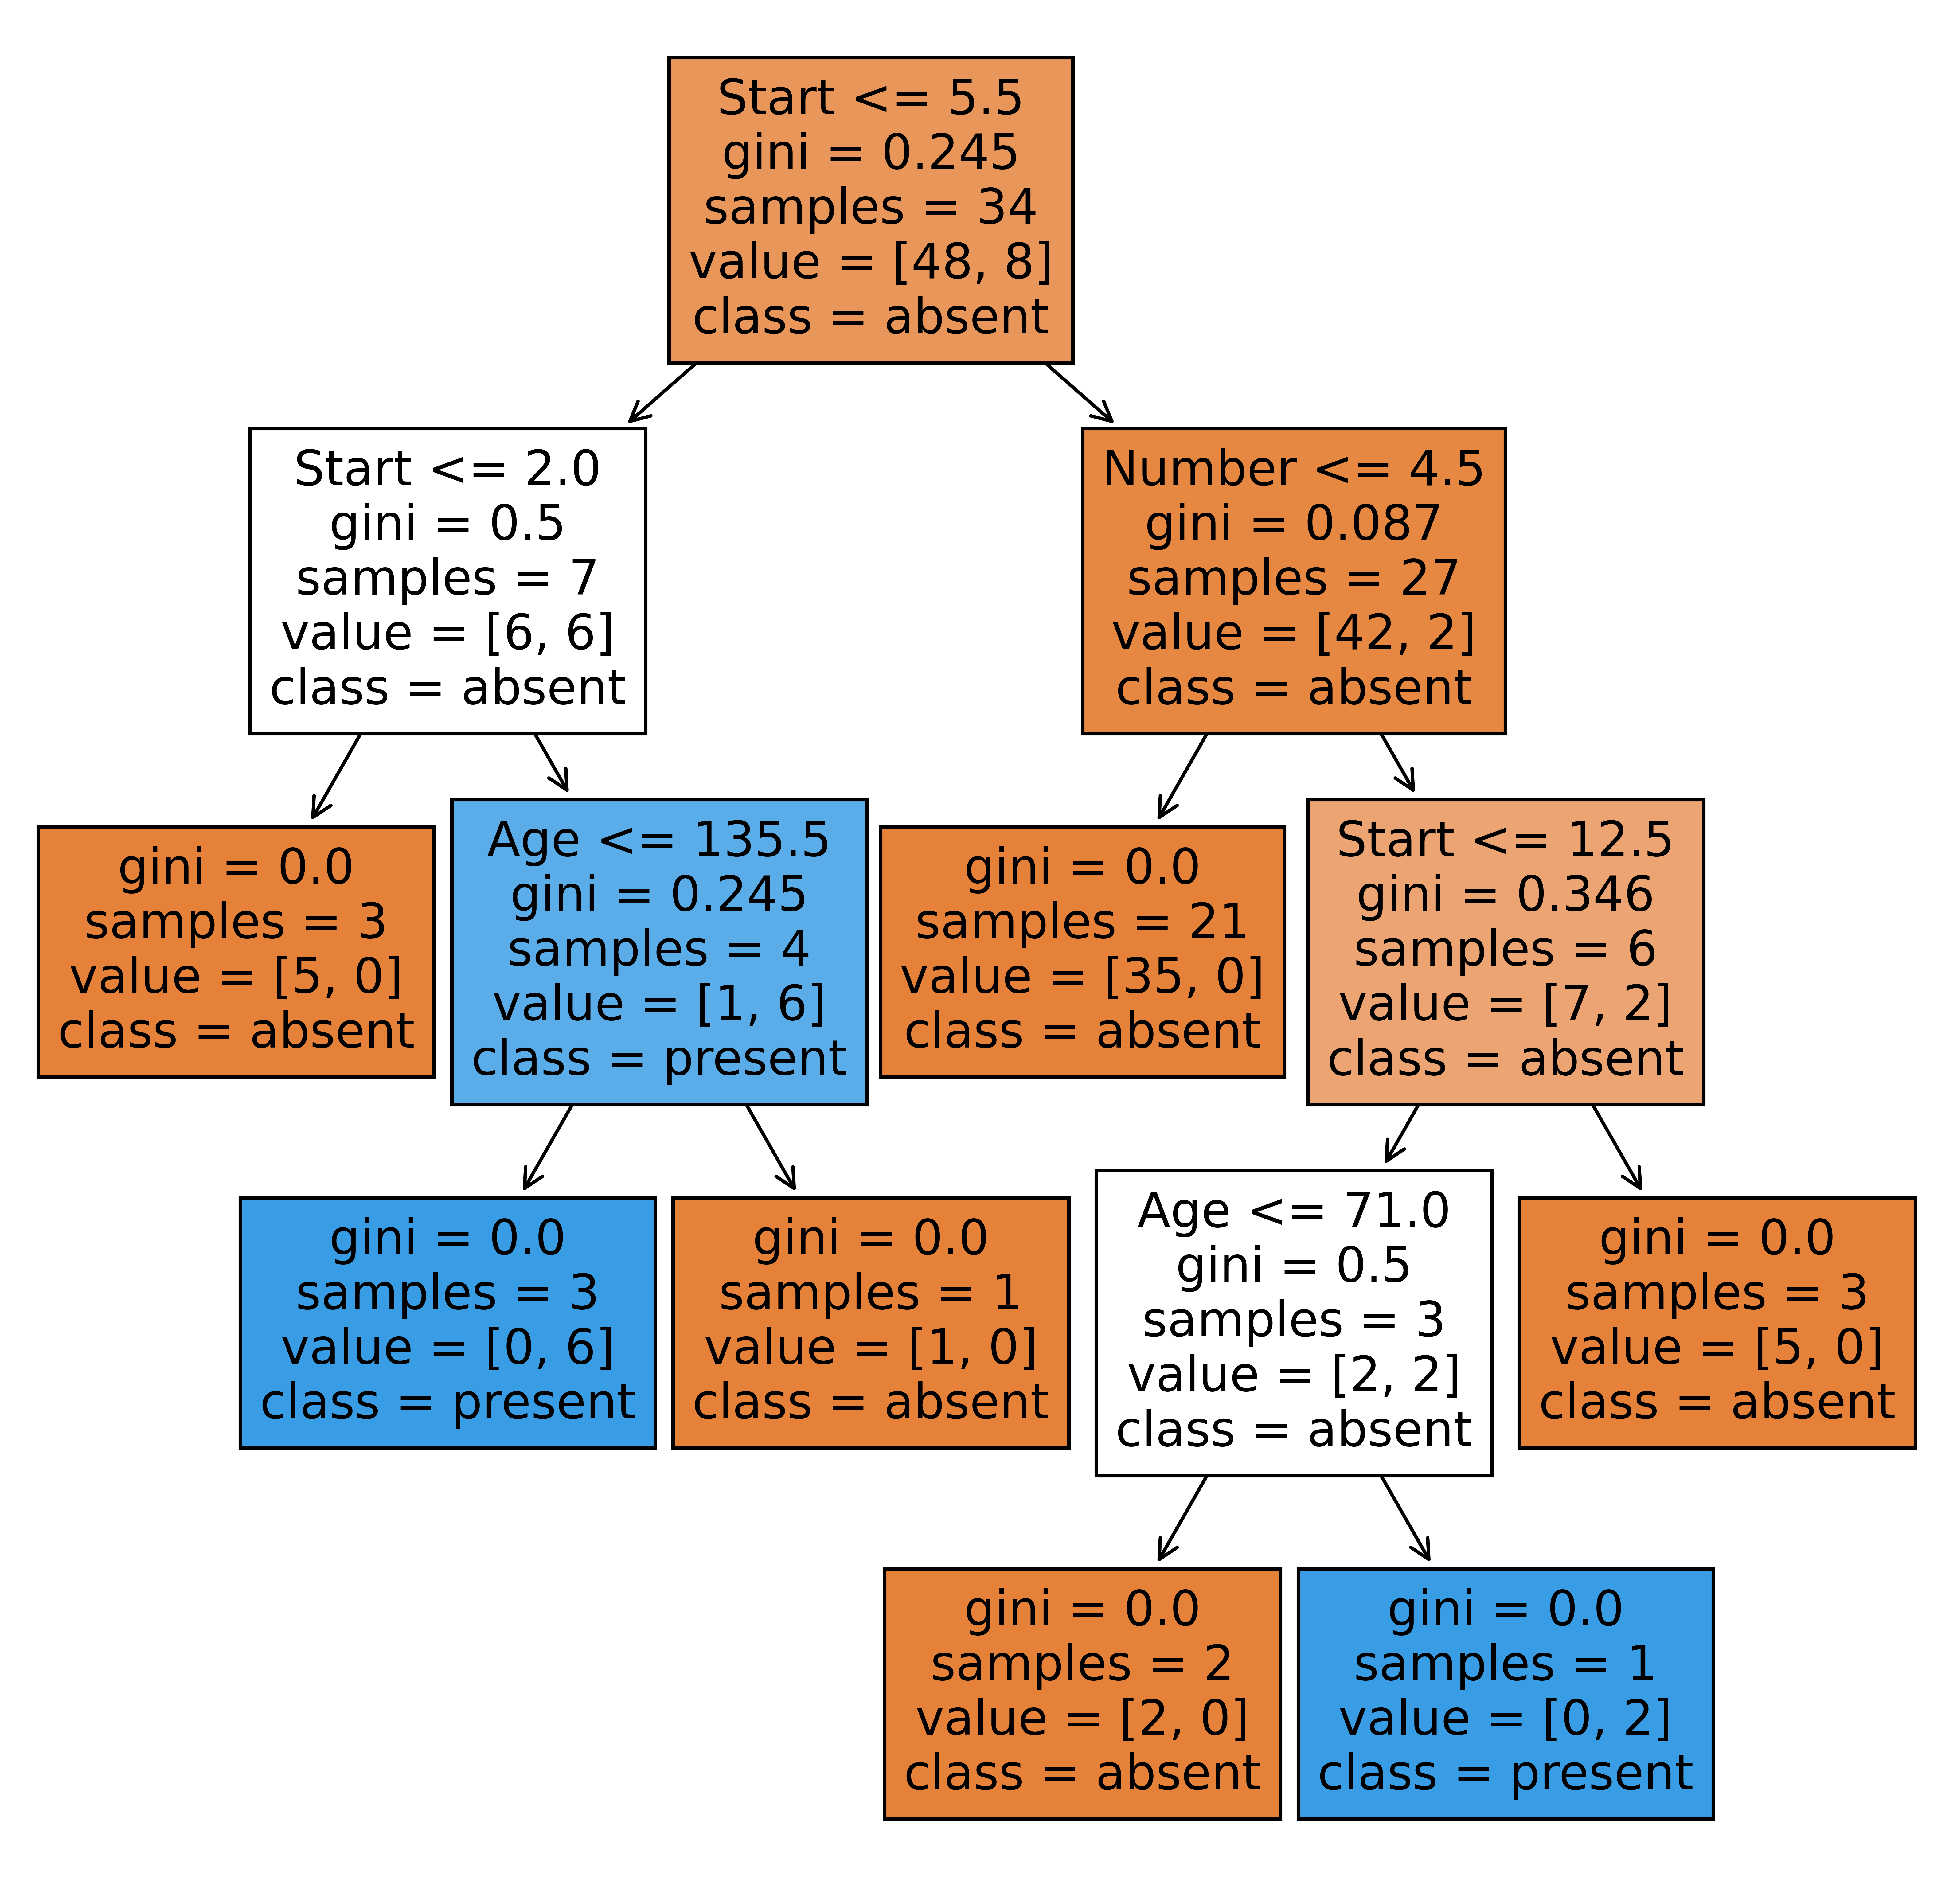

In [31]:
fn = feature
cn = targets
plt.figure(figsize=(20,20) )
fig, axes = plt.subplots(nrows =1, ncols = 1, figsize = (10,10), dpi = 800)
tree.plot_tree(model.estimators_[0], filled = True, feature_names = fn, class_names = cn)